<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Lecture -  1.3 Pandas indexing, seaborn data visualization, EDA metrics

In this lesson we will be using a boston housing market dataset. The columns of the dataset are coded as so:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset is for a different suburb of Boston.

These descriptions of shortened or coded variables are often described as "codebooks", or data dictionaries. They are the often found alongside datasets you might find online.

---

## 1. Load packages and data

In [4]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#boston_file = '/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/Dataset.csv'
boston = pd.read_csv('/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/Dataset.csv')

---

## 2. Describe the basic format and variables in the data:


In [5]:
# print out the first 4 rows:
boston.head(4)

,hhid,year,psu,hh,region,urbrur,hhsize,eqadu,hhexp,pcexp,...,FPHC,FPG,FSP,pcexpusd,exppcday,pcexpusd_ppp,exppcday_ppp,PHC,PG,SP
0,101,2011,1,1.0,1.0,1.0,6.0,4.960,1803581.0,335689.6,...,0.0,0.000000,0.000000,711.3262,1.948839,1518.357,4.159883,0,0.0,0.0
1,101,2014,1,1.0,1.0,1.0,6.0,5.000,2102144.0,376812.7,...,1.0,0.180984,0.032755,761.9153,2.087439,1678.211,4.597838,0,0.0,0.0
2,102,2011,1,2.0,1.0,1.0,4.0,2.465,2713224.0,757494.1,...,0.0,0.000000,0.000000,1605.1300,4.397616,3426.222,9.386909,0,0.0,0.0
3,102,2014,1,2.0,1.0,1.0,4.0,2.830,2996178.0,805604.7,...,0.0,0.000000,0.000000,1628.9330,4.462829,3587.922,9.829923,0,0.0,0.0


### Unwanted columns:

The `.read_csv()` function has added a column called `Unnamed: 0`, which appears to be just the number of the rows. We already have the number id of the rows in the DataFrame's index.

In [6]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
print boston.index
print boston.index.values[0:20]

RangeIndex(start=0, stop=7481, step=1)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [8]:
# Remove the unneccesary column:
#boston.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
boston.head(3)

,hhid,year,psu,hh,region,urbrur,hhsize,eqadu,hhexp,pcexp,...,FPHC,FPG,FSP,pcexpusd,exppcday,pcexpusd_ppp,exppcday_ppp,PHC,PG,SP
0,101,2011,1,1.0,1.0,1.0,6.0,4.960,1803581.0,335689.6,...,0.0,0.000000,0.000000,711.3262,1.948839,1518.357,4.159883,0,0.0,0.0
1,101,2014,1,1.0,1.0,1.0,6.0,5.000,2102144.0,376812.7,...,1.0,0.180984,0.032755,761.9153,2.087439,1678.211,4.597838,0,0.0,0.0
2,102,2011,1,2.0,1.0,1.0,4.0,2.465,2713224.0,757494.1,...,0.0,0.000000,0.000000,1605.1300,4.397616,3426.222,9.386909,0,0.0,0.0


### Make the column names more descriptive

The codes are fine for some people, but a more explicit reading is always helpful, and to do this I am going to use `.rename()` function.

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars

In [6]:
# rename changing columns takes a dictionary to reset the names:
boston.rename(columns={
        'CRIM':'rate_of_crime',
        'ZN':'residential_zone_pct',
        'INDUS':'business_zone_pct',
        'CHAS':'borders_river',
        'NOX':'oxide_concentration',
        'RM':'average_rooms',
        'AGE':'owner_occup_pct',
        'DIS':'dist_to_work',
        'RAD':'access_to_highway',
        'TAX':'property_tax',
        'PTRATIO':'student_teacher_ratio',
        'B':'black_stat',
        'LSTAT':'pct_underclass',
        'MEDV':'home_median_value'
    }, inplace=True)

In [7]:
boston.head(3)

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


### Describe the variables

Use the `.describe()` function here. What are some, if any, oddities you notice about the variables.

In [8]:
boston.describe()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are some potential outliers in variables here:

1. black_stat has at least one outlier at the min end of the range.
2. owner_occup_pct has at least one outlier at the min end.
3. business_zone_pct might have an outlier at the min end.
4. rate_of_crime has at least one outlier at the max end.

---

## 3. Plot variables with potential outliers using seaborn boxplots.

Some notes on seaborn's boxplot keyword argument options that I'm going to use:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent
    
    

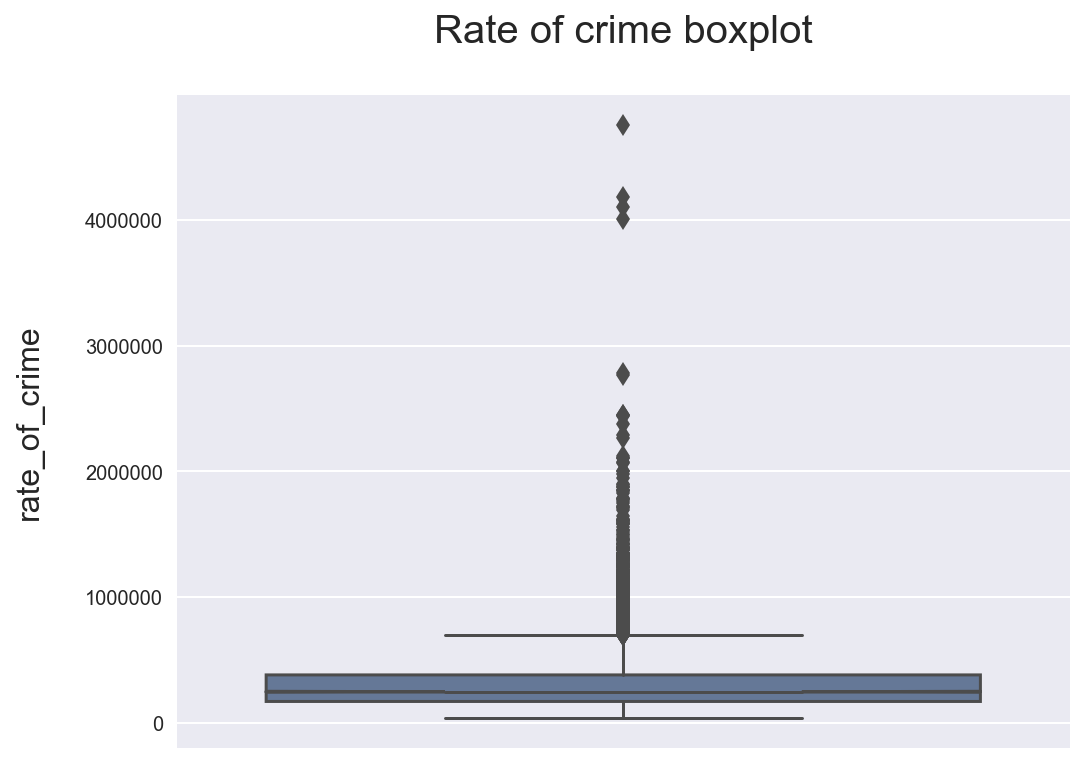

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(boston.pcexp, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('rate_of_crime\n', fontsize=16)
ax.set_title('Rate of crime boxplot\n', fontsize=20)

plt.show()

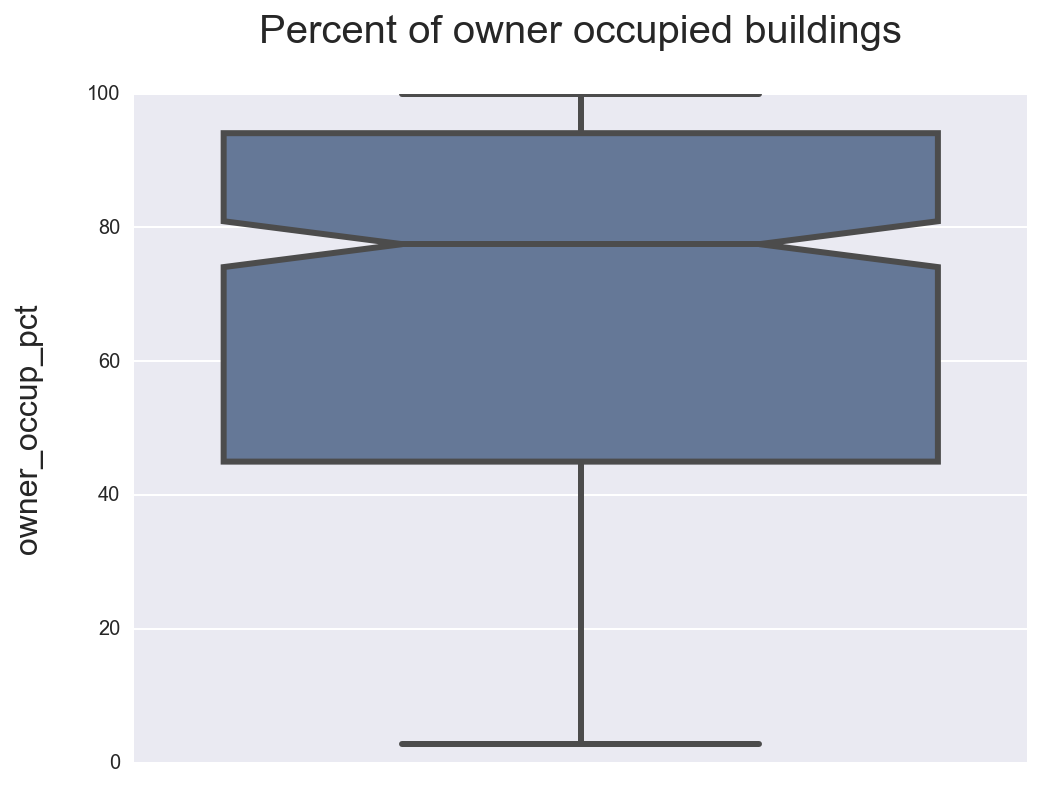

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(boston.owner_occup_pct, orient='v',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('owner_occup_pct\n', fontsize=16)
ax.set_title('Percent of owner occupied buildings\n', fontsize=20)

plt.show()

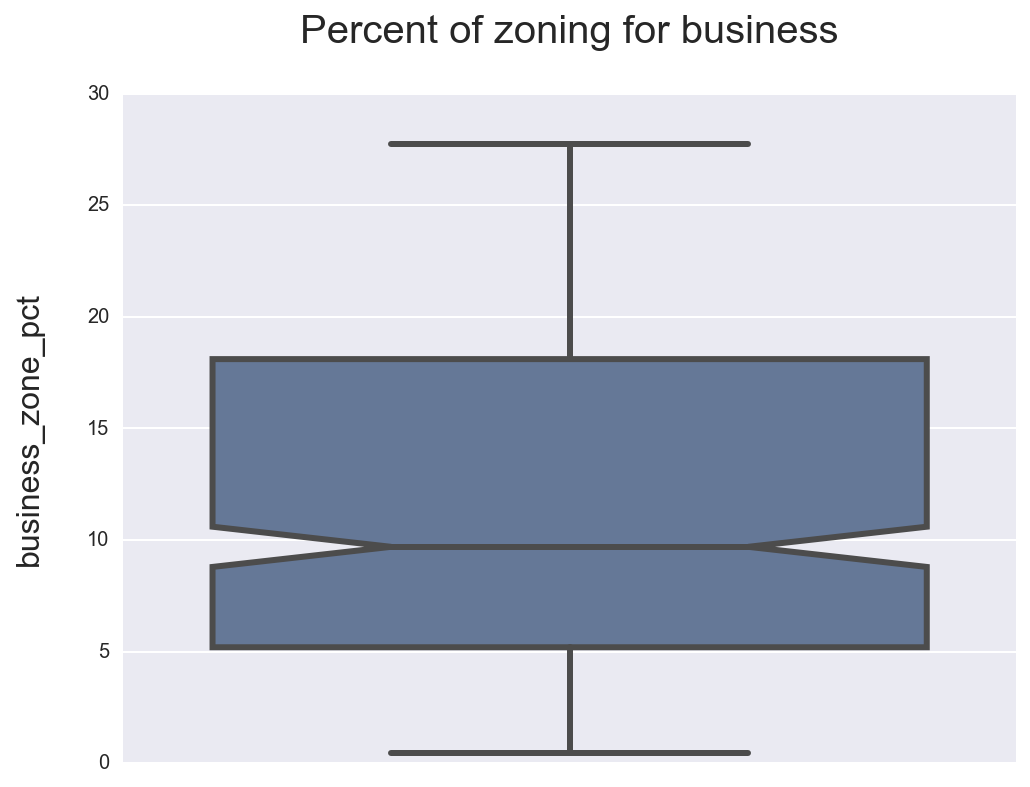

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(boston.business_zone_pct, orient='v',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('business_zone_pct\n', fontsize=16)
ax.set_title('Percent of zoning for business\n', fontsize=20)

plt.show()

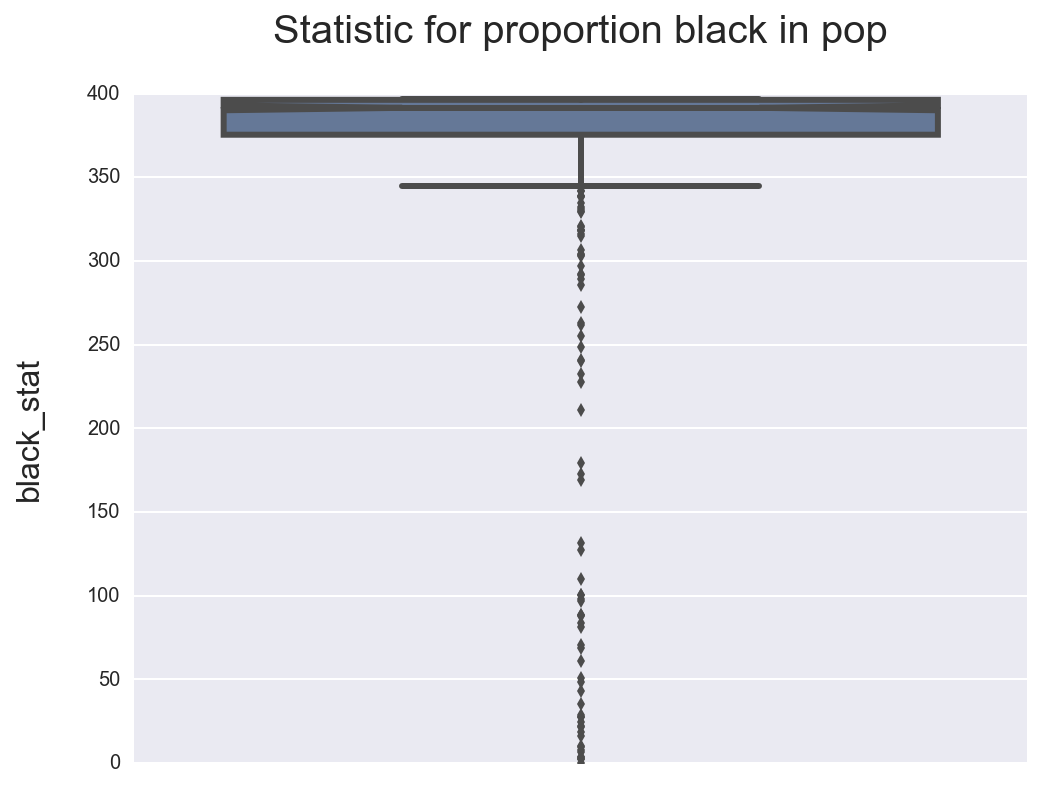

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(boston.black_stat, orient='v',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('black_stat\n', fontsize=16)
ax.set_title('Statistic for proportion black in pop\n', fontsize=20)

plt.show()

From the boxplots, it looks like rate of crime and the proportion black people statistic have real outliers. The other variables actually look OK.

---

## 4. Plot all the variables on boxplots together.

Let's try this first with the variables as they are, using a horizontal boxplot with seaborn.

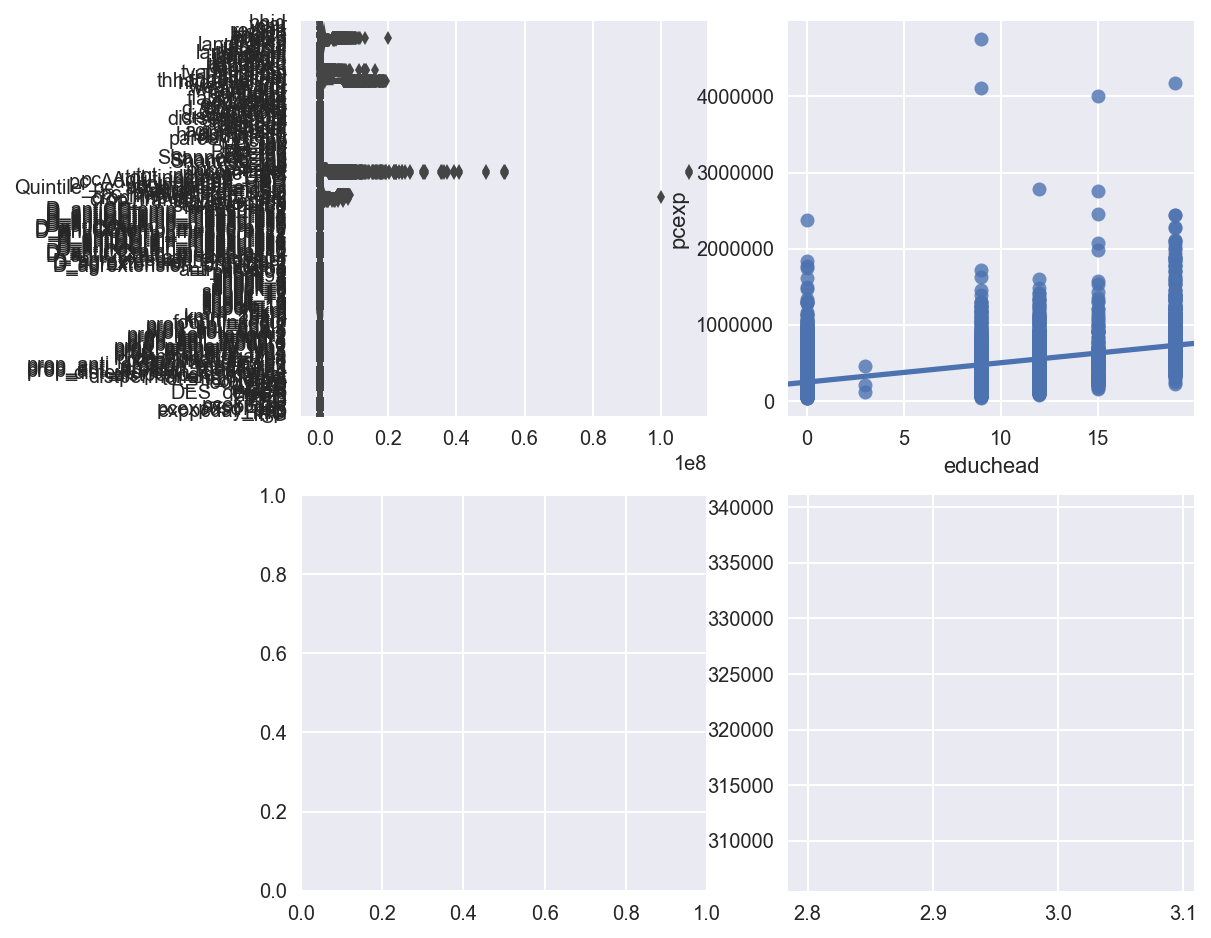

In [11]:
fig, axarr = plt.subplots(2, 2, figsize=(8,8),
                         sharex=False, sharey=False)
#ax = fig.gca()

axarr[0,0] = sns.boxplot(data=boston, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[0,0])

axarr[0,1] = sns.regplot(boston.dummy_irrigation,
                       boston., ax=axarr[0,1])

plt.show()


The boxplots are hard to visualize since all of these variables are on different scales!!!!.

---

## 5. Rescaling variables and plotting again.

Rescaling of variables is very common, and in fact when we get to regularization the rescaling procedure is actually going to become essential for the regularization to work.

Let's rescale the variables using a procedure called "standardization" or alternatively "normalization".

Normalization is a concise process:

    normalized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
What does this do, exactly? It forces the variable's values to have a mean of 0 and a standard deviation of 1. Nothing else is changed about the distribution of the variable. It doesn't become "normal" or anything. 

### 5.1 Extract rate of crime and plot the distribution 

Also print out the mean and standard deviation of the original variable.

ROC mean: 3.61352355731
ROC std: 8.5930413513


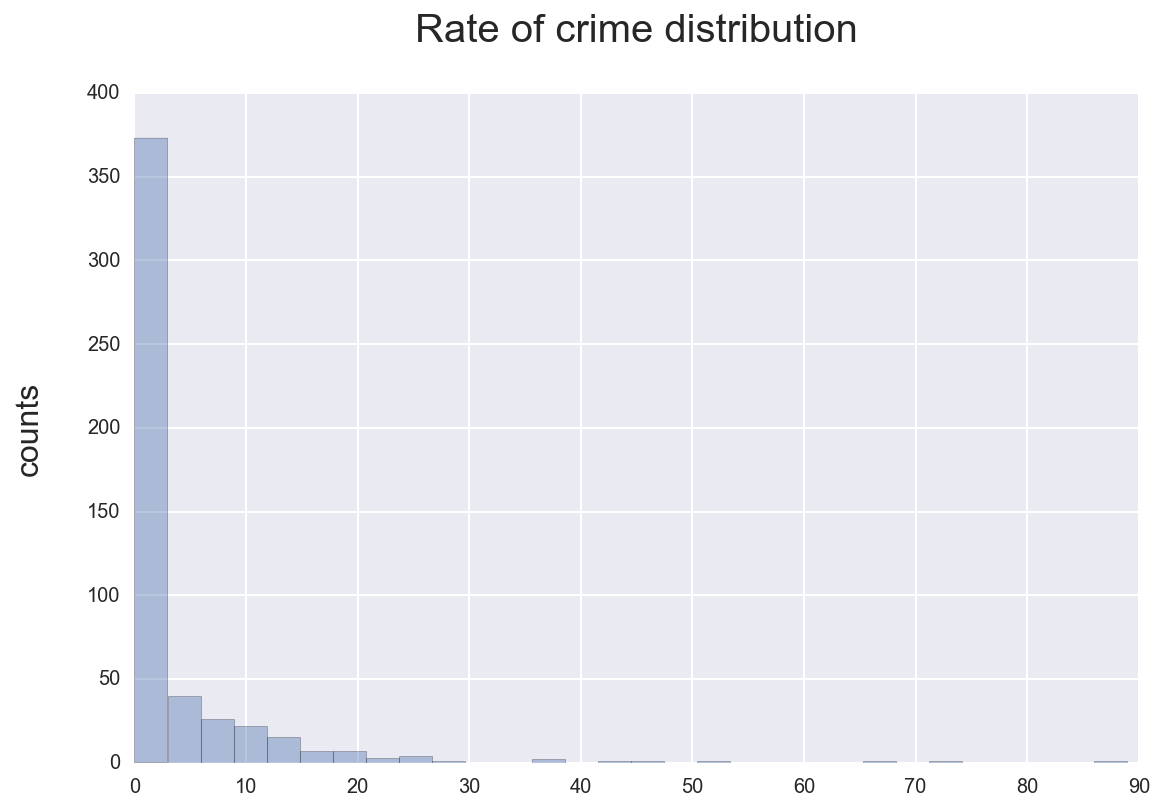

In [14]:
rate_of_crime = boston.rate_of_crime.values

roc_mean = np.mean(rate_of_crime)
roc_std = np.std(rate_of_crime)

print 'ROC mean:', roc_mean
print 'ROC std:', roc_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(rate_of_crime, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Rate of crime distribution\n', fontsize=20)

plt.show()

Normalize the rate_of_crime variable and plot again. Notice the new mean is centered at 0.

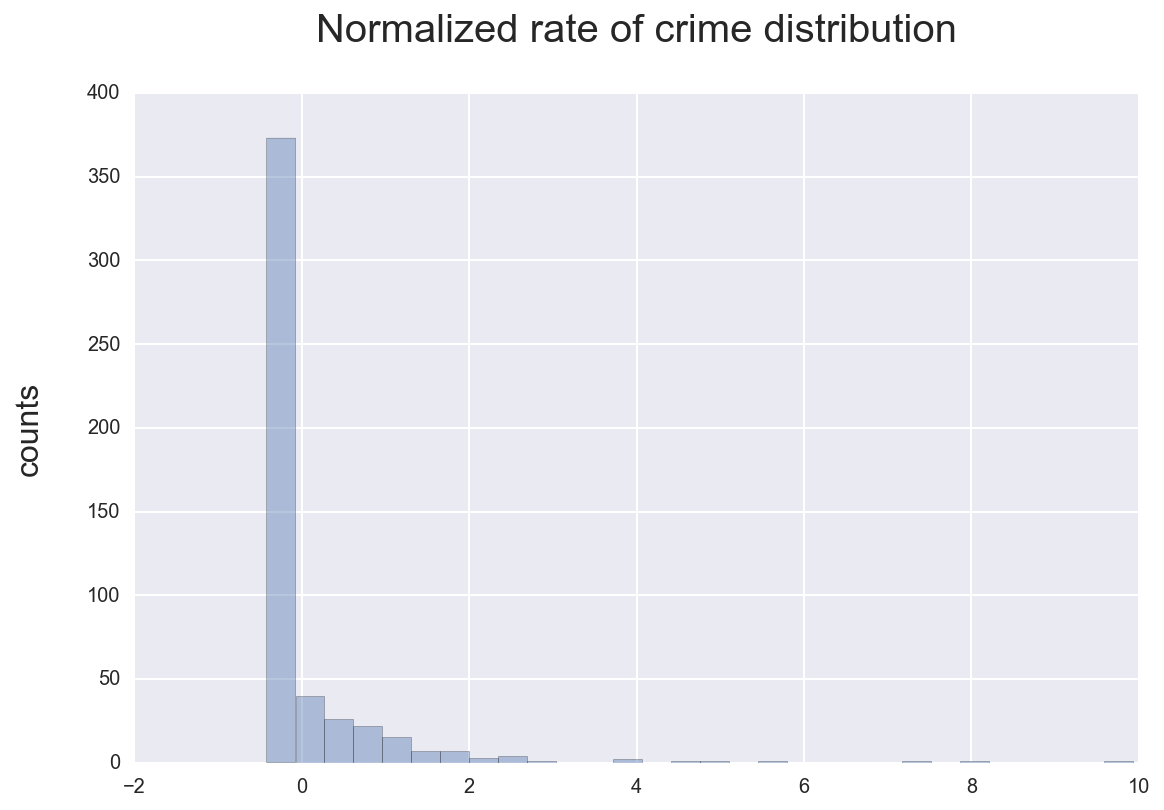

In [15]:
roc_norm = (rate_of_crime - roc_mean) / roc_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(roc_norm, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized rate of crime distribution\n', fontsize=20)

plt.show()

Print the normalized variable with outliers removed. Let's set the criteria for outliers to be any values that are above 4 * the std_dev of the variable (which is now just 4, since we have forced the standard deviation to be 1 through normalization!)

506
499


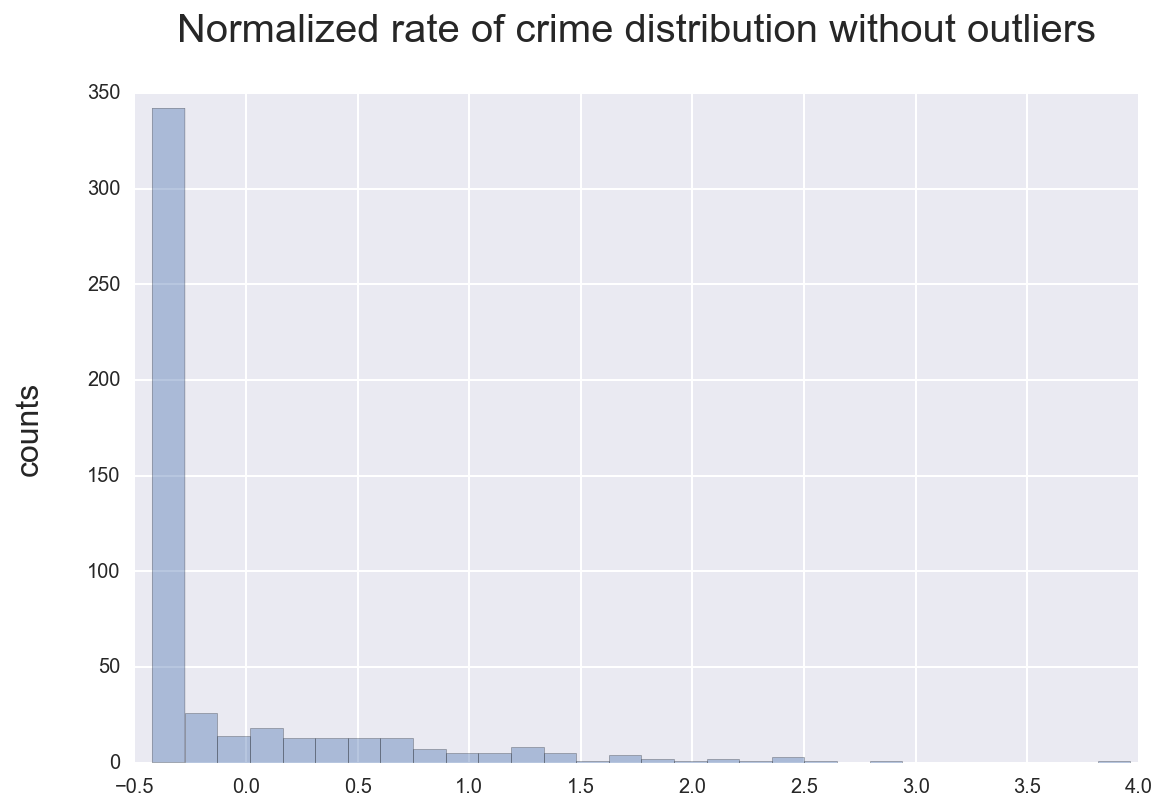

In [16]:

outlier_mask = (np.abs(roc_norm) < 4)
print len(roc_norm)
roc_norm_no_outliers = roc_norm[outlier_mask]
print len(roc_norm_no_outliers)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(roc_norm_no_outliers, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized rate of crime distribution without outliers\n', fontsize=20)

plt.show()

The variable is still extremely skewed. Dealing with this is a more difficult issue and we will explore this, but remember no method to get rid of skewness is perfect.)

---

## 6. Normalize all the variables and plot the full boxplot again.

Pandas DataFrames actually make it extremely easy to normalize columns all at once. Say we have a DataFrame `data`, then we can normalize all the columns like so:

    data_norm = (data_norm - data_norm.mean()) / data_norm.std()

In [17]:
boston_norm = (boston - boston.mean()) / boston.std()

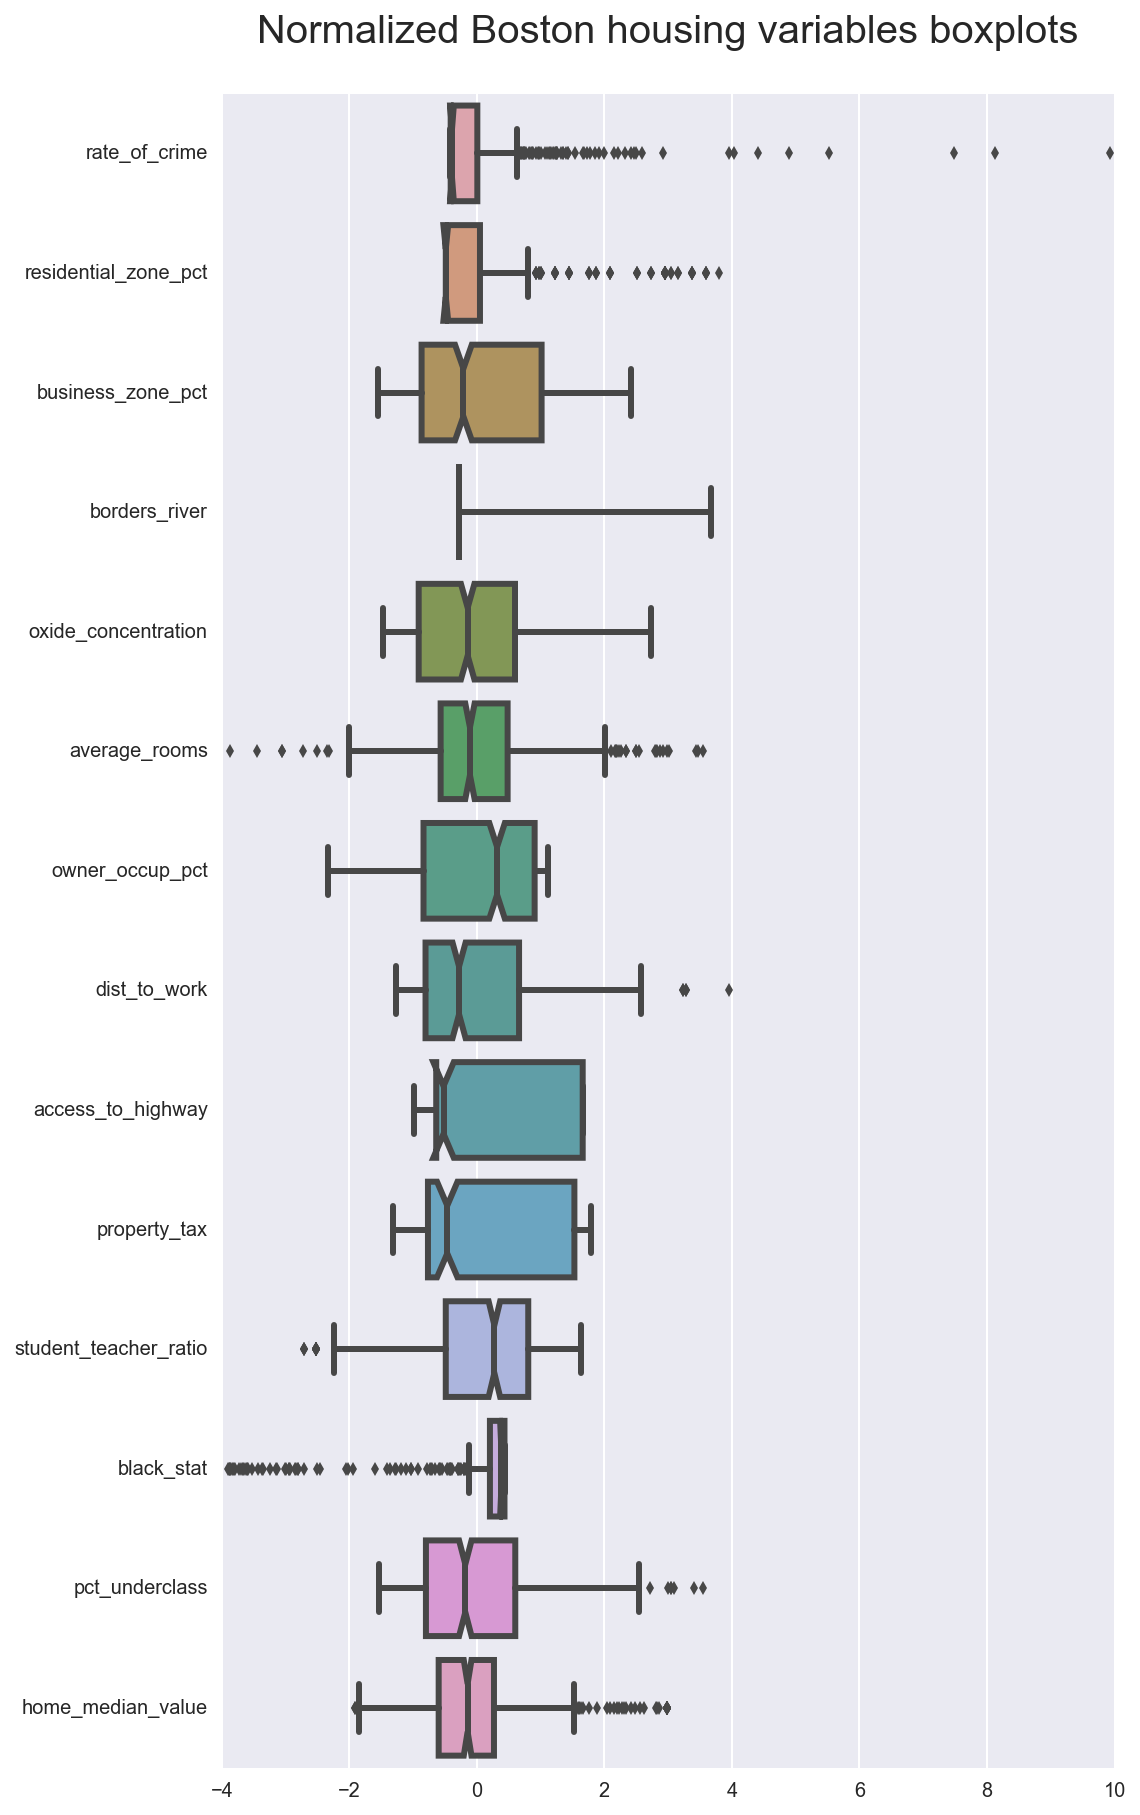

In [18]:
fig = plt.figure(figsize=(8,15))
ax = fig.gca()

sns.boxplot(data=boston_norm, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_title('Normalized Boston housing variables boxplots\n', fontsize=20)

plt.show()

---

## 6. Covariance and correlation of variables

A great way to immediately get a feel for relationships between your variables is with a correlation matrix.

Let's first examine the covariance and the correlation and calculate these by hand.

### 6.1 Covariance of variables

Given sample size $N$ variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$

The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of $X$ times deviations from the mean of $Y$ adjusted by the sample size $N$.

Code the covariance between `pct_underclass` and `home_median_value` below by hand. Verify that you got the correct result using `np.cov()`. Set the keyword argument `bias=True` in `np.cov()` to have it use the same covariance calculation.

Note: `np.cov` returns a covariance _matrix_, which will be each values covariance with itself and the other variable in matrix format.

In [19]:
pct_under = boston.pct_underclass
med_value = boston.home_median_value

under_value_cov = np.sum( ((pct_under - np.mean(pct_under))*(med_value - np.mean(med_value))) / boston.shape[0])
print under_value_cov
print np.cov(pct_under, med_value, bias=True)

-48.3517921933
[[ 50.89397935 -48.35179219]
 [-48.35179219  84.41955616]]


### 6.2 Correlation of variables

What's the problem with covariance? Well, its not very interpretable. The values are difficult to read because they are relative to the variance of the variables.

A much more common metric, and one easily calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

What the pearson correlation does is in fact directly related to what we did above during the normalization procedure. We are taking the covariance and dividing it by the product of the standard deviations of X and Y. This adjusts the value we get out by the variance of the variables so that $r$ must fall between -1 and 1.

Calculate the correlation between `pct_under` and `med_value` by hand below. Check that it is the same as `np.corrcoef()` with `bias=True`:


In [20]:
under_value_cor = under_value_cov / (np.std(pct_under) * np.std(med_value))

print under_value_cor
print np.corrcoef(pct_under, med_value, bias=True)

-0.737662726174
[[ 1.         -0.73766273]
 [-0.73766273  1.        ]]


### 6.3 The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [12]:
boston.corr()

,hhid,year,psu,hh,region,urbrur,hhsize,eqadu,hhexp,pcexp,...,FPHC,FPG,FSP,pcexpusd,exppcday,pcexpusd_ppp,exppcday_ppp,PHC,PG,SP
hhid,1.000000,-0.022416,1.000000,0.027971,0.979199,-0.498682,0.013835,0.027561,0.303690,0.272575,...,0.055470,0.060757,0.061992,0.273899,0.273899,0.273052,0.273052,-0.234822,-0.208377,-0.160068
year,-0.022416,1.000000,-0.022421,-0.091312,-0.018705,0.038839,0.009281,0.013071,0.074242,0.045690,...,0.366751,0.397611,0.349983,0.017822,0.017822,0.036506,0.036506,-0.004711,-0.019767,-0.001423
psu,1.000000,-0.022421,1.000000,0.027954,0.979202,-0.498828,0.013835,0.027566,0.303761,0.272653,...,0.055467,0.060753,0.061986,0.273977,0.273977,0.273129,0.273129,-0.234893,-0.208451,-0.160133
hh,0.027971,-0.091312,0.027954,1.000000,0.028339,0.014685,-0.089843,-0.012790,-0.154820,-0.160181,...,-0.048118,-0.040763,-0.029384,-0.160834,-0.160834,-0.160420,-0.160420,-0.142364,0.146046,0.124409
region,0.979199,-0.018705,0.979202,0.028339,1.000000,-0.502529,0.028292,0.040307,0.288526,0.254237,...,0.039530,0.049318,0.053077,0.255455,0.255455,0.254676,0.254676,-0.223134,-0.197324,-0.149714
urbrur,-0.498682,0.038839,-0.498828,0.014685,-0.502529,1.000000,0.016295,-0.017343,-0.498247,-0.471216,...,0.052993,0.043326,0.031836,-0.473261,-0.473261,-0.471960,-0.471960,0.461310,0.490474,0.426020
hhsize,0.013835,0.009281,0.013835,-0.089843,0.028292,0.016295,1.000000,0.980039,0.332490,-0.287063,...,0.376333,0.372453,0.315616,-0.287424,-0.287424,-0.287224,-0.287224,0.278009,0.346240,0.339916
eqadu,0.027561,0.013071,0.027566,-0.012790,0.040307,-0.017343,0.980039,1.000000,0.375991,-0.247915,...,0.366069,0.363211,0.307212,-0.248679,-0.248679,-0.248203,-0.248203,0.225688,0.298737,0.293708
hhexp,0.303690,0.074242,0.303761,-0.154820,0.288526,-0.498247,0.332490,0.375991,1.000000,0.647516,...,-0.069306,-0.109623,-0.112740,0.645310,0.645310,0.646884,0.646884,-0.516628,-0.503374,-0.434532
pcexp,0.272575,0.045690,0.272653,-0.160181,0.254237,-0.471216,-0.287063,-0.247915,0.647516,1.000000,...,-0.314762,-0.312578,-0.269040,0.999337,0.999337,0.999928,0.999928,-0.685381,-0.648227,-0.551622


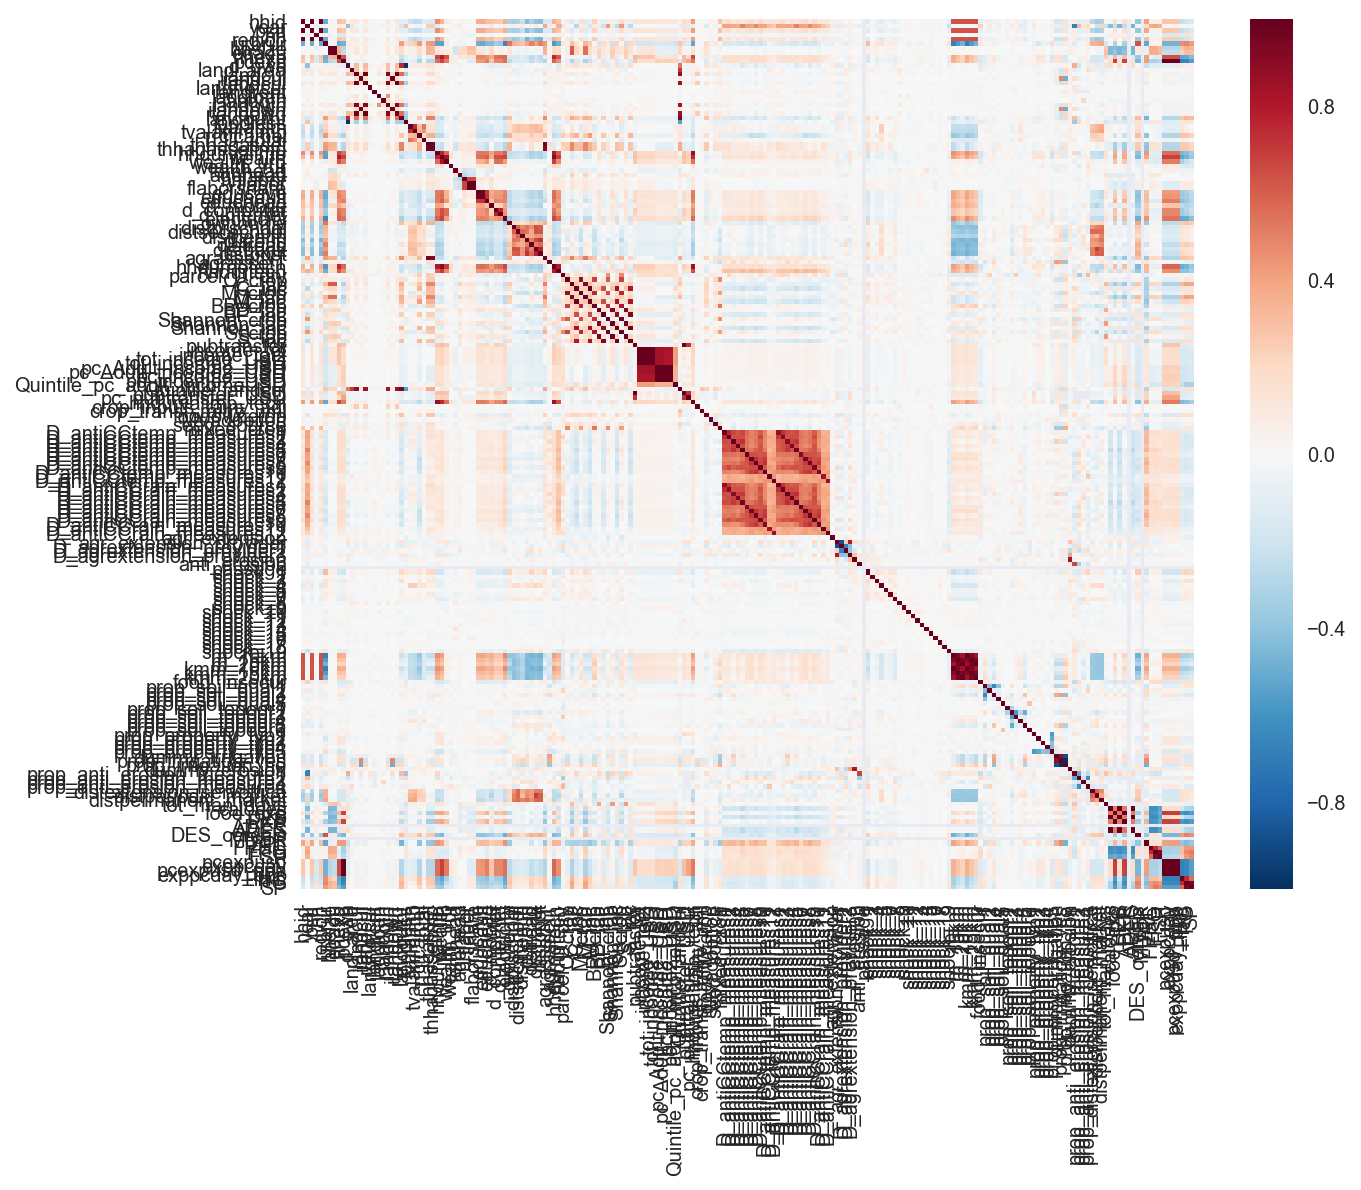

In [13]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(boston.corr(), ax=ax)
plt.show()

---

## 7. Scatterplots

Choose two variables that appear very related and two variables that appear to be unrelated.

Use seaborns `regplot` to plot a scatter plot between the pairs of variables. `regplot` will also plot a regression line by default – we will go into regressions next week. They are, as you might expect, very related to correlations. You can turn this off with `fit_reg=False` if you want.

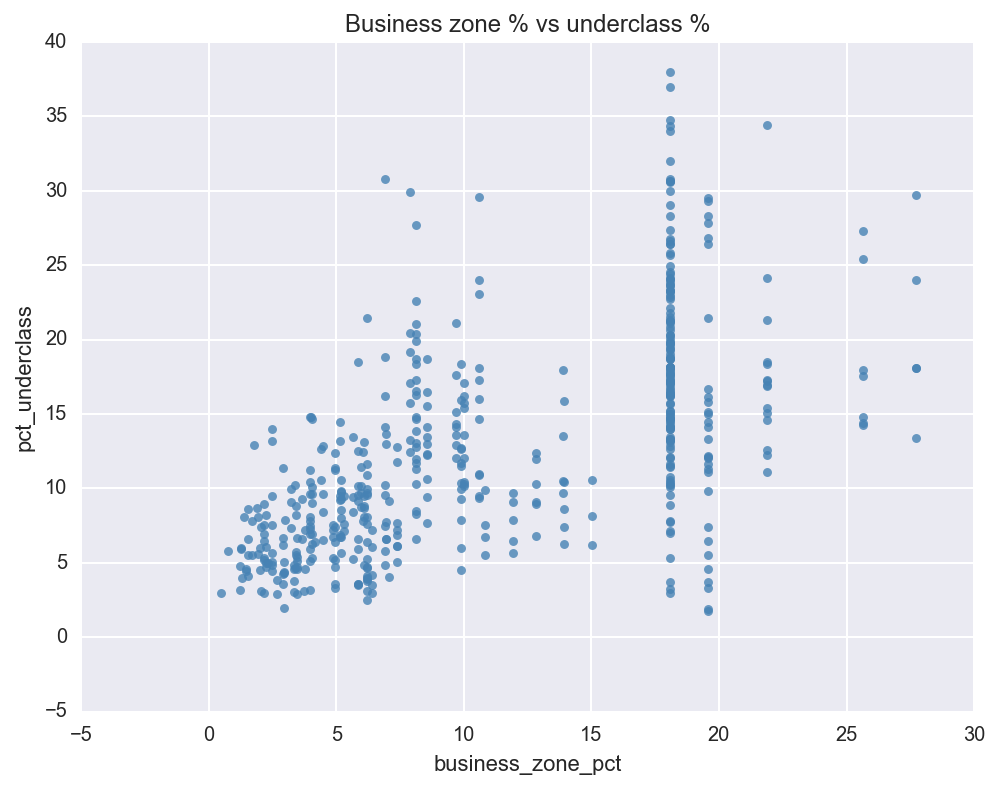

In [23]:
biz_zone_pct = boston.business_zone_pct
pct_underclass = boston.pct_underclass

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(biz_zone_pct, pct_underclass, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('Business zone % vs underclass %')
plt.show()

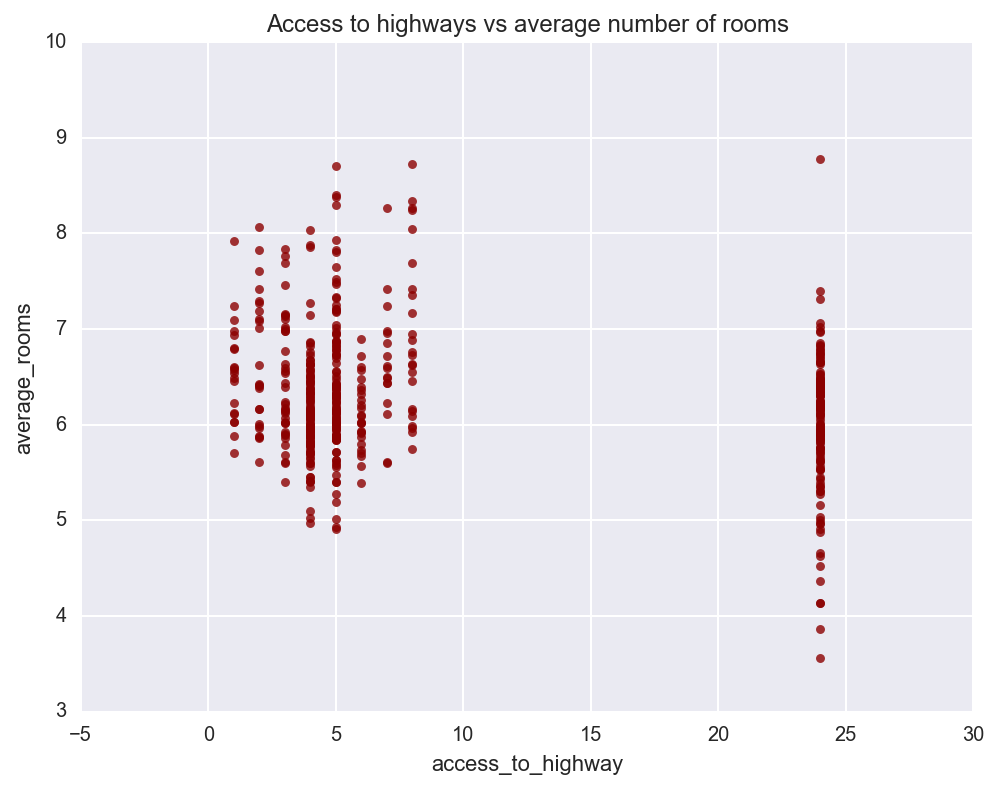

In [24]:
highway_access = boston.access_to_highway
avg_rooms = boston.average_rooms

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(highway_access, avg_rooms, fit_reg=False, color='darkred', ax=ax)

ax.set_title('Access to highways vs average number of rooms')
plt.show()